<a href="https://colab.research.google.com/github/filiptomczak/colab/blob/main/supervised/01_basic/missing_vals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

jesli brak dancyh

-usuniecie rekordow z brakami
-uzupelnienie brakow srednia,medianą itp
-wytrenowanie modelu w celu uzupelnieina brakow
-interpolacja
-dodanie nowej kategorii 'brak'

In [2]:
import numpy as np
import pandas as pd
import sklearn

data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [3]:
df=df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 420.0+ bytes


In [4]:
df.isnull().sum()
df.isnull().sum().sum()

df.isnull().sum()/len(df)


,0
size,0.166667
color,0.000000
gender,0.166667
price,0.166667
weight,0.333333
bought,0.000000


In [5]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(df[['weight']])
imputer.statistics_
df['weight']=imputer.transform(df[['weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [6]:
imputer=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=99.0)
imputer.fit_transform(df[['price']])

array([[199.],
       [ 89.],
       [ 99.],
       [129.],
       [ 79.],
       [ 89.]])

In [7]:
imputer=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value='L')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['M'],
       ['M']], dtype=object)

In [8]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [11]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
df[['weight','price']]=imputer.fit_transform(df[['weight','price']])
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df[['gender','size']]=imputer.fit_transform(df[['gender','size']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,female,117.0,300.0,yes
3,M,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [12]:
df=df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [14]:
df.fillna(value='brak')

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,green,female,129.0,brak,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,brak,no


In [16]:
df['size'].fillna(value='L',inplace=True)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [22]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df=pd.DataFrame(data=data,index=date_range)
df


,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


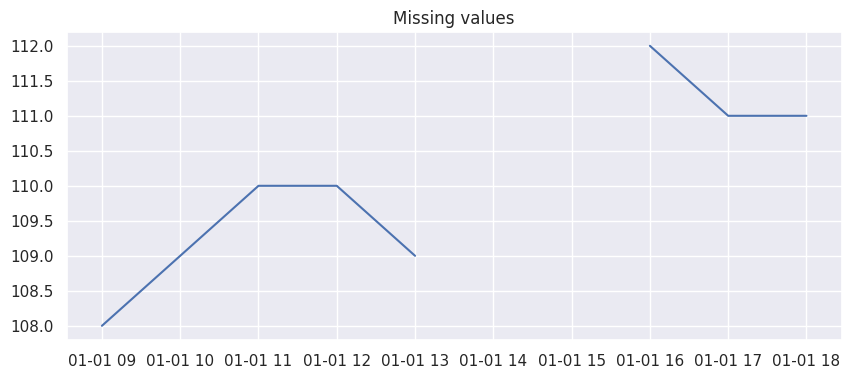

In [23]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters()
sns.set()

plt.figure(figsize=(10,4))
plt.title("Missing values")
_=plt.plot(df.price)

In [24]:
import plotly.express as px
df_plotly=df.reset_index()
px.line(df_plotly,'index','price',width=600,height=400,title='time series - missing data')

In [26]:
df_plotly=df_plotly.dropna()
px.line(df_plotly,'index','price',width=600,height=400,title='time series - missing data')

In [29]:
df_plotly=df.reset_index()
df_plotly['price_fill']=df_plotly['price'].fillna(0)
px.line(df_plotly,'index','price_fill',width=600,height=400,title='time series - missing data - put 0s')

In [38]:
df_plotly=df.reset_index()

df_plotly['price_fill']=df_plotly['price'].fillna(df_plotly['price'].mean())

px.line(df_plotly,'index','price_fill',width=600,height=400,title='time series - missing data - put mean')

In [39]:
df_plotly=df.reset_index()
df_plotly['price_fill']=df_plotly['price'].fillna(df_plotly['price'].interpolate())

px.line(df_plotly,'index','price_fill',width=600,height=400,title='time series - missing data - put interpolate')

In [47]:
df_plotly=df.reset_index()

df_plotly['price_fill']=df_plotly['price'].fillna(df_plotly['price'].ffill())
px.line(df_plotly,'index','price_fill',width=600,height=400,title='time series - missing data - put forwad fill')


In [46]:
df_plotly=df.reset_index()

df_plotly['price_fill']=df_plotly['price'].fillna(df_plotly['price'].bfill())
px.line(df_plotly,'index','price_fill',width=600,height=400,title='time series - missing data - put backward fill')
